In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import defaultdict

In [32]:
def euclidean_dis(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [33]:
def initialize_centroids(data,K):
    centroids = []
    for i in range(K):
        centroids.append(data[i])
    return centroids

In [34]:
def isConverged(K,old_centroid,new_centroid):

    for i in range(len(new_centroid)):
        for j in range(len(new_centroid[i])):
            if new_centroid[i][j]!=old_centroid[i][j]:
                return False
    return True

In [35]:
def kmeans(data,K):
    centroids=initialize_centroids(data,K)

    while(True):

        classes=[[] for i in range(K)]
        old_centroid=centroids[:]
        for datapoint in data:
            distance=[]
            for j in range(K):

                dis=euclidean_dis(datapoint,centroids[j])

                distance.append(dis)

            index=distance.index(min(distance))
            classes[index].append(datapoint)
        
            

        for c in range(K):
            new_centroid=np.mean(classes[c],axis=0)
            centroids[c]=new_centroid

        if isConverged(K,old_centroid,centroids):
            break

    
    return classes,centroids

In [36]:
def calculate_distortion(classes,centroids):
    dist=0
    for i in range(len(centroids)):
        c=classes[i]
        cent=centroids[i]
        temp_dist=0
        for j in range(len(c)):
            temp_dist+=euclidean_dis(c[j],cent)
        dist+=temp_dist
        
    return dist/len(classes)

In [37]:
def plot_distortion(k,distortion):
    plt.plot(k,distortion)
    plt.xlabel("cluster(k)")
    plt.ylabel("Distortion")
    plt.title("No of cluster(k) vs distortion")
    plt.show()

In [38]:
def plot_error(k,error):
    plt.plot(k,error)
    plt.xlabel("cluster(k)")
    plt.ylabel("Error")
    plt.title("No of cluster(k) vs error")
    plt.show()

In [39]:
def get_index(c,x):
    for i in range(len(x)):
        if (x[i]==c).all():
            return i

In [40]:
def cal_missclassification(classes,x,y):
    count=0
    for i in range(len(classes)):
        c=classes[i]
        for j in range(len(c)):
            ind=get_index(c[j],x)
            if y[ind]==i:
                count+=1
    return len(x)-count
        

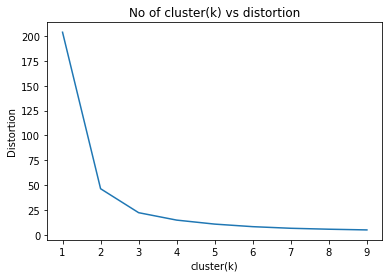

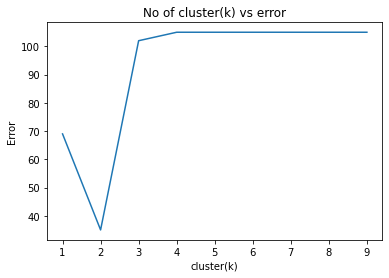

In [56]:
df=pd.read_csv('iris.csv')
x=(df.iloc[:,1:5]).to_numpy()
y=(df.iloc[:,-1]).to_numpy()


for i in range(len(y)):
    if y[i]=='Iris-setosa':
        y[i]=0
    elif y[i]=='Iris-versicolor':
        y[i]=1
    elif y[i]=='Iris-virginica':
        y[i]=2
x,y=shuffle(x,y,random_state=0)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  


k=list(range(1, 10))
error=[]
distortion=[]
for i in range(len(k)):
    
    classes,centroids=kmeans(x_train,k[i])
    d=calculate_distortion(classes,centroids)
    distortion.append(d)
    e=cal_missclassification(classes,x_train,y_train)
    error.append(e)
plot_distortion(k,distortion)
plot_error(k,error)



In [42]:
def cal_phix(x,u,sigma):
    t=np.linalg.norm(x-u)
    return math.exp(-t**2/(2*(sigma)**2))

In [43]:
def onehot(y,k):
    y_hot=[[0]*k]*len(y)
    for i in range(len(y)):
        if y[i]==0:
            y_hot[i]=[1,0,0]
        elif y[i]==1:
            y_hot[i]=[0,1,0]
        elif y[i]==2:
            y_hot[i]=[0,0,1]
    return y_hot

In [44]:
def cal_wcap(phi,y):
    #np.linalg.inv(a)
    phi=np.array(phi)
    t=np.dot(phi.T,phi)
    inverse=np.linalg.inv(t)
    return inverse*np.dot(phi.T,y)

In [45]:
def predict(phi_test,wcap):
    return np.dot(phi_test,wcap)

In [46]:
def cal_accuracy(y_test,y_test_pred):
    count=0
    for i in range(len(y_test)):
        ind=np.argmax(y_test_pred[i])
        if ind==y_test[i]:
            count+=1
    return count/len(y_test)

In [47]:



df=pd.read_csv('iris.csv')
x=(df.iloc[:,1:5]).to_numpy()
y=(df.iloc[:,-1]).to_numpy()


for i in range(len(y)):
    if y[i]=='Iris-setosa':
        y[i]=0
    elif y[i]=='Iris-versicolor':
        y[i]=1
    elif y[i]=='Iris-virginica':
        y[i]=2
        
x,y=shuffle(x,y,random_state=0)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=31)

#optimal cluster
K=3
classes,centroids=kmeans(x,K)

In [48]:
d=[0]
for i in range(K):
    ui=centroids[i]
    for j in range(i+1,K):
        uj=centroids[j]
        t=np.linalg.norm(ui-uj)
        d.append(t)
print(d)
dmax=max(d)

[0, 1.7884235436555795, 4.988054041834385, 3.346416464356444]


In [49]:
sigma=dmax/math.sqrt(2*K)

In [50]:
phix=[]
for i in range(len(x_train)):
    temp=[]
    for j in range(K):
        t=cal_phix(x_train[i],centroids[j],sigma)
        temp.append(t)
    phix.append(temp)

In [51]:
y_train_encode=onehot(y_train,K)
wcap=cal_wcap(phix,y_train_encode)

In [52]:
phi_test=[]
for i in range(len(x_test)):
    temp=[]
    for j in range(K):
        t=cal_phix(x_test[i],centroids[j],sigma)
        temp.append(t)
    phi_test.append(temp)

In [53]:
y_test_pred=predict(phi_test,wcap)

In [54]:
accuracy=cal_accuracy(y_test,y_test_pred)

In [55]:
print("Accuracy on test set:",accuracy*100,"%")

Accuracy on test set: 84.44444444444444 %
